In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
math_df = pd.read_csv("data/math_data.csv")

In [3]:
math_df

,School,Sex,Age,Address,Family Size,Parental Status,Mother Education,Father Education,Mother Job,Father Job,Reason for School,Guardian,Travel Time,Study Time,# of Failures,Extra Educational Support,Extra Family Support,Extra Paid Classes,Extracurricular,Nursery,Desire Higher Education,Internet Access,Romantic Relationship,Family Relationship Quality,Amount of Free Time,Frequency of Going Out,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Abscences,1st Period Grade,2nd Period Grade,Final Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [4]:
math_df = math_df.drop(columns = ['Sex', 'Age', 'Mother Education', 'Father Education', 'Mother Job', 'Father Job', 'Guardian', 'Parental Status'])
math_data_ex = math_df.iloc[:, :-3] # Only taking features that isn't the final grade or semester grades
math_data_inc = math_df.iloc[:, :-1] # Only taking features that isn't the final grade
math_outcome = math_df.iloc[:, -1:] # Only want the outcome of the final grade.

In [5]:
# Preprocessing of math data df to turn binary string values and categorial variables into integers
# Copying excluded and included datasets to keep original intact
no_yes_answer = {'no': 0,'yes': 1}
school_identity = {'GP': 0,'MS': 1} 
urban_rural = {'U': 0,'R': 1} 
family_size = {'LE3': 0,'GT3': 1}  
binary_categories = {
                     "Extra Educational Support": no_yes_answer,
                     "Extra Family Support": no_yes_answer,
                     "Extra Paid Classes": no_yes_answer,
                     "Extracurricular": no_yes_answer,
                     "Nursery": no_yes_answer,
                     "Desire Higher Education": no_yes_answer,
                     "Internet Access": no_yes_answer,
                     "Romantic Relationship": no_yes_answer,
                     "School": school_identity,
                     "Address": urban_rural,
                     "Family Size": family_size,
                    }

encode_math_data_ex = math_data_ex.copy()
encode_math_data_inc = math_data_inc.copy()

encode_math_data_ex = encode_math_data_ex.replace(binary_categories)
encode_math_data_inc = encode_math_data_inc.replace(binary_categories)

categorial_features = encode_math_data_ex.select_dtypes(include=object).columns.tolist()
encode_math_data_ex = pd.get_dummies(encode_math_data_ex, columns=categorial_features)
encode_math_data_inc = pd.get_dummies(encode_math_data_inc, columns=categorial_features)

In [6]:
# Preprocessing of math outcome df to turn final grade values into a binary pass/no pass
# Making a copy of the df since we want to keep the original dataframe
def bin_conversion(outcomes):
    for i, score in enumerate(outcomes["Final Grade"]):
        if score > 9:
            outcomes.at[i] = 1
        else:
            outcomes.at[i] = 0
    
    return outcomes

bin_math_outcome = math_outcome.copy()
bin_math_outcome = bin_conversion(bin_math_outcome)

In [7]:
# Splitting one hot encoded data and binary math outcomes into train and test sets
# This cell is creation of train and test datasets that excludes semester grades
from sklearn.model_selection import train_test_split
math_data_train_ex_bin, math_data_test_ex_bin, math_outcome_train_ex_bin, math_outcome_test_ex_bin = train_test_split(encode_math_data_ex, bin_math_outcome, test_size=0.30,shuffle=True)
math_data_train_ex_bin, math_data_test_ex_bin, math_outcome_train_ex_bin, math_outcome_test_ex_bin = math_data_train_ex_bin.values, math_data_test_ex_bin.values, math_outcome_train_ex_bin.values.ravel(), math_outcome_test_ex_bin.values.ravel()

In [8]:
# This cell is creation of train and test datasets that includes semester grades
math_data_train_inc_bin, math_data_test_inc_bin, math_outcome_train_inc_bin, math_outcome_test_inc_bin = train_test_split(encode_math_data_inc, bin_math_outcome, test_size=0.30,shuffle=True)
math_data_train_inc_bin, math_data_test_inc_bin, math_outcome_train_inc_bin, math_outcome_test_inc_bin = math_data_train_inc_bin.values, math_data_test_inc_bin.values, math_outcome_train_inc_bin.values.ravel(), math_outcome_test_inc_bin.values.ravel()

In [9]:
def root_mean_squared_error(y, y_hat):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(y, y_hat, squared=False)

In [10]:
def correct_percentage(y, y_hat):
    n = len(y)
    accuracyList = []
    for i in range(n):
        if y[i] == y_hat[i]:
            accuracyList.append(1)
        else:
            accuracyList.append(0)
            
    return (sum(accuracyList) / n) * 100

In [11]:
def confusion_matrix(y, y_hat):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i, tval  in enumerate(y):
        pval = y_hat[i]
        if tval == 0 and pval == 0:
            tn += 1
        elif tval == 1 and pval == 1:
            tp += 1
        elif tval == 0 and pval == 1:
            fp += 1
        elif tval == 1 and pval == 0:
            fn += 1
            
    return tp, tn, fp, fn

In [13]:
# Using four different machine learning models on data
# 1. Decision Tree
# 2. Random Forest
# 3. Ridge Regression
# 4. Neural Net
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
dt_bin = tree.DecisionTreeClassifier(max_depth=5)
rf_bin = RandomForestClassifier(max_depth=5)
ridgereg_bin = linear_model.Ridge()
neurnet_bin = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
scaler_bin = StandardScaler()

In [14]:
# Next few cells will be fitting and prediciting the models on the exlucded dataset
# This is with outcomes with a binary value (0 or 1)
# Decision tree model
dt_bin.fit(math_data_train_ex_bin, math_outcome_train_ex_bin)
dt_yhat = dt_bin.predict(math_data_test_ex_bin)
dt_per_binex = correct_percentage(math_outcome_test_ex_bin, dt_yhat)

In [15]:
# Random forest model
rf_bin.fit(math_data_train_ex_bin, math_outcome_train_ex_bin)
rf_yhat = rf_bin.predict(math_data_test_ex_bin)
rf_per_binex = correct_percentage(math_outcome_test_ex_bin, rf_yhat)

In [16]:
# Ridge regression model
ridgereg_bin.fit(math_data_train_ex_bin, math_outcome_train_ex_bin)
ridgereg_yhat = ridgereg_bin.predict(math_data_test_ex_bin)
ridgereg_per_binex = correct_percentage(math_outcome_test_ex_bin, np.round(ridgereg_yhat))

In [17]:
# Neural network model, input data needs to be scaled in order to fit data
scaler_bin.fit(math_data_train_ex_bin)
math_data_train_scaled = scaler_bin.transform(math_data_train_ex_bin)
math_data_test_scaled = scaler_bin.transform(math_data_test_ex_bin)
neurnet_bin.fit(math_data_train_scaled, math_outcome_train_ex_bin)
neurnet_yhat = neurnet_bin.predict(math_data_test_scaled)
neurnet_per_binex = correct_percentage(math_outcome_test_ex_bin, neurnet_yhat)

/home/tle/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
# Creating a confusion matrix with data excluding semester grades
# We will be using the decision tree model to to generate the matrix
tp_ex, tn_ex, fp_ex, fn_ex = confusion_matrix(math_outcome_test_ex_bin, dt_yhat)
data_ex = [[tp_ex, fp_ex], [fn_ex, tn_ex]]
matrix_ex = pd.DataFrame(data_ex, columns=["Postive", "Negative"], index=["Positive", "Negative"])
matrix_ex

,Postive,Negative
Positive,73,16
Negative,13,17


In [19]:
# Precision and recall of decision tree data when excluding semester grades
precision_ex = tp_ex / (tp_ex + fp_ex)
recall_ex = tp_ex / (tp_ex + fn_ex)
print("Precision: {}".format(precision_ex))
print("Recall: {}".format(recall_ex))

Precision: 0.8202247191011236
Recall: 0.8488372093023255


In [20]:
# See which features have the most weight in the random forest model. 
feature_importances = pd.DataFrame(rf_bin.feature_importances_,
                                   index = encode_math_data_ex.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
# of Failures,0.193148
Abscences,0.141488
Frequency of Going Out,0.085901
Amount of Free Time,0.047776
Health Status,0.042948


In [21]:
# Next few cells will be fitting and prediciting the models on the included dataset
# Decision tree model
dt_bin.fit(math_data_train_inc_bin, math_outcome_train_inc_bin)
dt_yhat = dt_bin.predict(math_data_test_inc_bin)
dt_per_bininc = correct_percentage(math_outcome_test_inc_bin, dt_yhat)

In [22]:
# Random forest model
rf_bin.fit(math_data_train_inc_bin, math_outcome_train_inc_bin)
rf_yhat = rf_bin.predict(math_data_test_inc_bin)
rf_per_bininc = correct_percentage(math_outcome_test_inc_bin, rf_yhat)

In [23]:
# Ridge regression model
ridgereg_bin.fit(math_data_train_inc_bin, math_outcome_train_inc_bin)
ridgereg_yhat = ridgereg_bin.predict(math_data_test_inc_bin)
ridgereg_per_bininc = correct_percentage(math_outcome_test_inc_bin, np.round(ridgereg_yhat))

In [24]:
# Neural network model, input data needs to be scaled in order to fit data
scaler_bin.fit(math_data_train_inc_bin)
math_data_train_scaled = scaler_bin.transform(math_data_train_inc_bin)
math_data_test_scaled = scaler_bin.transform(math_data_test_inc_bin)
neurnet_bin.fit(math_data_train_scaled, math_outcome_train_inc_bin)
neurnet_yhat = neurnet_bin.predict(math_data_test_scaled)
neurnet_per_bininc = correct_percentage(math_outcome_test_inc_bin, neurnet_yhat)

In [25]:
# Creating a confusion matrix with data inccluding semester grades
# We will be using the decision tree model to to generate the matrix
tp_inc, tn_inc, fp_inc, fn_inc = confusion_matrix(math_outcome_test_inc_bin, dt_yhat)
data_inc = [[tp_inc, fp_inc], [fn_inc, tn_inc]]
matrix_inc = pd.DataFrame(data_inc, columns=["Postive", "Negative"], index=["Positive", "Negative"])
matrix_inc

,Postive,Negative
Positive,68,5
Negative,13,33


In [26]:
# Precision and recall of decision tree data when inccluding semester grades
precision_inc = tp_inc / (tp_inc + fp_inc)
recall_inc = tp_inc / (tp_inc + fn_inc)
print("Precision: {}".format(precision_inc))
print("Recall: {}".format(recall_inc))

Precision: 0.9315068493150684
Recall: 0.8395061728395061


In [27]:
feature_importances = pd.DataFrame(rf_bin.feature_importances_,
                                   index = encode_math_data_inc.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
2nd Period Grade,0.472367
1st Period Grade,0.271162
# of Failures,0.046333
Abscences,0.029106
Frequency of Going Out,0.025963


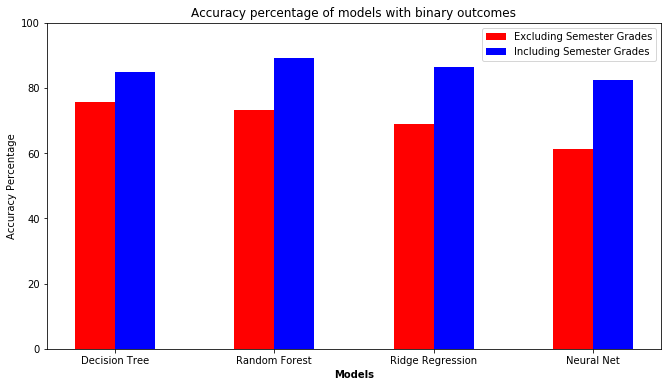

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
bin_ex_percentages = np.round([dt_per_binex, rf_per_binex, ridgereg_per_binex, neurnet_per_binex], 2)
bin_inc_percentages= np.round([dt_per_bininc, rf_per_bininc, ridgereg_per_bininc, neurnet_per_bininc], 2)
x_labels = ["Decision Tree", "Random Forest", "Ridge Regression", "Neural Net"]

barWidth = 0.25

x = np.arange(len(x_labels))
plt.xticks(x, x_labels)

r1 = plt.bar(x - barWidth/2, bin_ex_percentages, width=barWidth, color="red", label="Excluding Semester Grades")
r2 = plt.bar(x + barWidth/2, bin_inc_percentages, width=barWidth, color="blue", label="Including Semester Grades")

plt.ylabel("Accuracy Percentage")
plt.xlabel("Models", fontweight="bold")
plt.ylim(top=100, bottom=0)
plt.title("Accuracy percentage of models with binary outcomes")
plt.legend()
plt.show()

In [29]:
print("Excluding semester grades percentages: {}".format(bin_ex_percentages))
print("Including semester grades percentages: {}".format(bin_inc_percentages))

Excluding semester grades percentages: [75.63 73.11 68.91 61.34]
Including semester grades percentages: [84.87 89.08 86.55 82.35]


In [30]:
# Splitting one hot encoded data and integer (0-20) math outcomes into train and test sets
# This cell is creation of train and test datasets that excludes semester grades
from sklearn.model_selection import train_test_split
math_data_train_ex, math_data_test_ex, math_outcome_train_ex, math_outcome_test_ex = train_test_split(encode_math_data_ex, math_outcome, test_size=0.30,shuffle=True)
math_data_train_ex, math_data_test_ex, math_outcome_train_ex, math_outcome_test_ex = math_data_train_ex.values, math_data_test_ex.values, math_outcome_train_ex.values.ravel(), math_outcome_test_ex.values.ravel()

In [31]:
# This cell is creation of train and test datasets that includes semester grades
math_data_train_inc, math_data_test_inc, math_outcome_train_inc, math_outcome_test_inc = train_test_split(encode_math_data_inc, math_outcome, test_size=0.30,shuffle=True)
math_data_train_inc, math_data_test_inc, math_outcome_train_inc, math_outcome_test_inc = math_data_train_inc.values, math_data_test_inc.values, math_outcome_train_inc.values.ravel(), math_outcome_test_inc.values.ravel()

In [32]:
# Initializing new machine learning models so that the ones made before won't be used again
dt = tree.DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5)
ridgereg = linear_model.Ridge()
neurnet = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=500)
scaler = StandardScaler()

In [33]:
# Next few cells will be fitting and prediciting the models on the exlucded dataset
# This is with outcomes on a scale of 0-20
# Decision tree model
dt.fit(math_data_train_ex, math_outcome_train_ex)
dt_yhat = dt.predict(math_data_test_ex)
dt_rmse_ex = root_mean_squared_error(math_outcome_test_ex, dt_yhat)

In [34]:
# Random forest model
rf.fit(math_data_train_ex, math_outcome_train_ex)
rf_yhat = rf.predict(math_data_test_ex)
rf_rmse_ex = root_mean_squared_error(math_outcome_test_ex, rf_yhat)

In [35]:
# Ridge regression model
ridgereg.fit(math_data_train_ex, math_outcome_train_ex)
ridgereg_yhat = ridgereg.predict(math_data_test_ex)
ridgereg_rmse_ex = root_mean_squared_error(math_outcome_test_ex, ridgereg_yhat)

In [36]:
# Neural network model, input data needs to be scaled in order to fit data
scaler.fit(math_data_train_ex)
math_data_train_scaled = scaler.transform(math_data_train_ex)
math_data_test_scaled = scaler.transform(math_data_test_ex)
neurnet.fit(math_data_train_scaled, math_outcome_train_ex)
neurnet_yhat = neurnet.predict(math_data_test_scaled)
neurnet_rmse_ex = root_mean_squared_error(math_outcome_test_ex, neurnet_yhat)

/home/tle/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
# See which features have the most weight in the random forest model. 
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = encode_math_data_ex.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
Abscences,0.169484
Weekend Alcohol Consumption,0.069829
Health Status,0.069599
# of Failures,0.067124
Frequency of Going Out,0.056394


In [38]:
# Next few cells will be fitting and prediciting the models on the included dataset
# Decision tree model
dt.fit(math_data_train_inc, math_outcome_train_inc)
dt_yhat = dt.predict(math_data_test_inc)
dt_rmse_inc = root_mean_squared_error(math_outcome_test_inc, dt_yhat)

In [39]:
# Random forest model
rf.fit(math_data_train_inc, math_outcome_train_inc)
rf_yhat = rf.predict(math_data_test_inc)
rf_rmse_inc = root_mean_squared_error(math_outcome_test_inc, rf_yhat)

In [40]:
# Ridge regression model
ridgereg.fit(math_data_train_inc, math_outcome_train_inc)
ridgereg_yhat = ridgereg.predict(math_data_test_inc)
ridgereg_rmse_inc = root_mean_squared_error(math_outcome_test_inc, np.round(ridgereg_yhat))

In [41]:
# Neural network model, input data needs to be scaled in order to fit data
scaler.fit(math_data_train_inc)
math_data_train_scaled = scaler.transform(math_data_train_inc)
math_data_test_scaled = scaler.transform(math_data_test_inc)
neurnet.fit(math_data_train_scaled, math_outcome_train_inc)
neurnet_yhat = neurnet.predict(math_data_test_scaled)
neurnet_rmse_inc = root_mean_squared_error(math_outcome_test_inc, neurnet_yhat)

In [42]:
# See which features have the most weight in the random forest model. 
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = encode_math_data_inc.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
2nd Period Grade,0.255858
1st Period Grade,0.162792
Abscences,0.096777
Health Status,0.038310
Weekend Alcohol Consumption,0.035641


In [43]:
rmse_ex = np.round([dt_rmse_ex, rf_rmse_ex, ridgereg_rmse_ex, neurnet_rmse_ex], 4)
print(rmse_ex)

[4.7624 5.4611 4.5356 5.9444]


In [44]:
rmse_inc = np.round([dt_rmse_inc, rf_rmse_inc, ridgereg_rmse_inc, neurnet_rmse_inc], 4)
print(rmse_inc) 

[1.1632 2.144  1.7728 2.9563]
